In [187]:
import numpy as np
import scipy as sp
import scipy.interpolate
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

import minkowskitools as mt

In [14]:
n=8000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [15]:
connections = mt.get_connections(points, pval=2, radius=.05)
short_path, short_length = mt.shortest_path(connections.astype(bool))

(31, 1.4142135623730951)

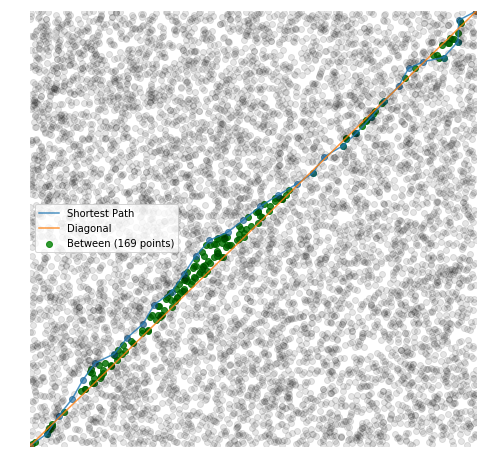

In [7]:
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
fig, ax = plt.subplots(figsize=(8, 8))
betweens = mt.points_between(points, short_path_points)
ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
mt.plot_path_points(ax, paths=[short_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Shortest Path', 'Diagonal'])
ax.scatter(*points, c='k', alpha=0.1)
short_length, np.sqrt(2)

# plt.savefig('./img/betweenseg.pdf')

In [8]:
long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
long_path, long_length = mt.longest_path(connections)
short_path, short_length = mt.shortest_path(connections)
short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))

In [9]:
long_path_points = np.array([points[:, u] for u in long_path]).transpose()
long_path_pointsBool = np.array([points[:, u] for u in long_pathBool]).transpose()
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
short_path_pointsBool = np.array([points[:, u] for u in short_pathBool]).transpose()

Longest Distance 1.952833802330653
Longest Network 174
Shortest Distance 1.415883104512034
Shortest Network 31


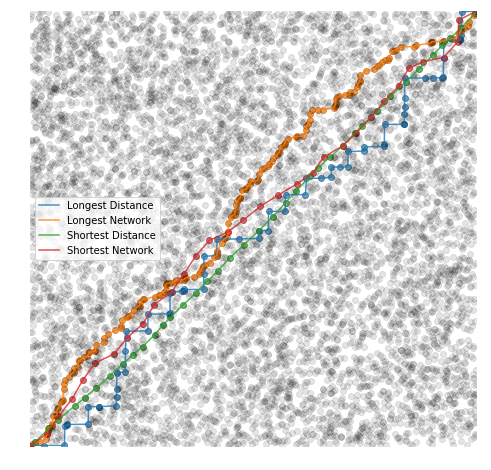

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
# betweens = mt.points_between(points, long_path_points)
# ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
# mt.plot_path_points(ax, paths=[long_path_points, np.array([[0, 1], [0, 1]])], path_labels=['Longest Path', 'Diagonal'])
mt.plot_path_points(ax, paths=[long_path_points, long_path_pointsBool, short_path_points, short_path_pointsBool], path_labels=['Longest Distance', 'Longest Network', 'Shortest Distance', 'Shortest Network'])
ax.scatter(*points, c='k', alpha=0.1)

path_labels=['Longest Distance', 'Longest Network', 'Shortest Distance', 'Shortest Network']
dists = [long_length, long_lengthBool, short_length, short_lengthBool]

for label, dist in zip(path_labels, dists):
    print(label, dist)

42.13643547048328


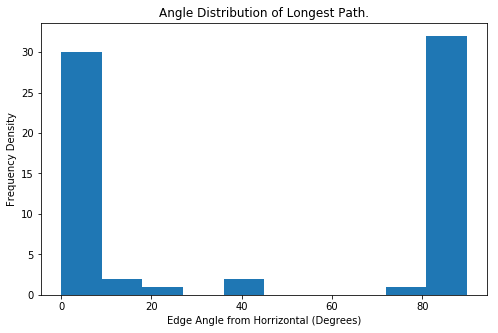

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
long_angles = mt.path_angles(long_path_points)*180/np.pi #puts into degrees
ax.hist(long_angles)
ax.set(title='Angle Distribution of Longest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
print(np.std(long_angles))

In [275]:
n=8000
n_systems = 10

ps, rs = [0.8, 1, 1.2], [0.2, 0.1, 0.1]

ps = [0.6, 0.8, 1, 1.2, 1.4]
r_rel = np.array([1.43, 1.14, 1, 0.92, 0.87])
rs = r_rel/30

ensemble_points = [np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1) for count in range(n_systems)]

ensemble_short_paths = []

for points, i in zip(ensemble_points, range(n_systems)):
    print(i)
    print('Getting connections', end='')
    diff_connections = [mt.get_connections(points, pval=p, radius=r) for p, r,label in zip(ps, rs, path_labels) if not print(': '+ label, end=' ')]
    print()
    print('Getting shortest paths', end='')
    short_paths = [mt.shortest_path(connections)[0] for connections, label in zip(diff_connections, path_labels) if not print(': '+ label, end=' ')]
    print()    
    
    short_path_points = {p:np.array([points[:, u] for u in path]).transpose() for p, path in zip(ps, short_paths)}
    ensemble_short_paths.append(short_path_points)

0
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
1
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
2
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
3
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
4
Getting connections: p=0.6, r=0.0715 : p=0.8, r=0.057 : p=1, r=0.05 : p=1.2, r=0.046 : p=1.4, r=0.0435 
Getting shortest paths: p=0.6, r=0.0715 : 

KeyError: 7999

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


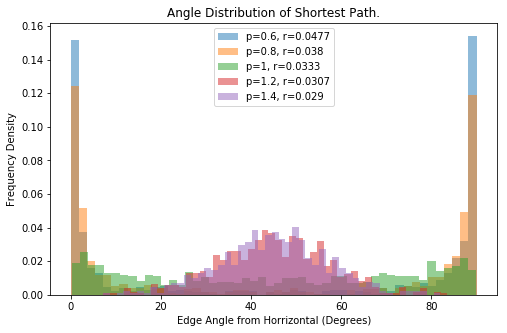

In [276]:
fig, ax = plt.subplots(figsize=(8, 5))

for p, r in zip(ps, rs):
    flat_angles = (np.concatenate([mt.path_angles(all_paths[p]) for all_paths in ensemble_short_paths], axis=0))
    ax.hist(flat_angles*180/np.pi, label='p={}, r={:.3}'.format(p, r), alpha=0.5, bins=50, normed=1)

ax.set(title='Angle Distribution of Shortest Path.', xlabel='Edge Angle from Horrizontal (Degrees)', ylabel='Frequency Density')
ax.legend()
# plt.savefig('img/2ang_dist_10_8e3_30.pdf')

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:154: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:155: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


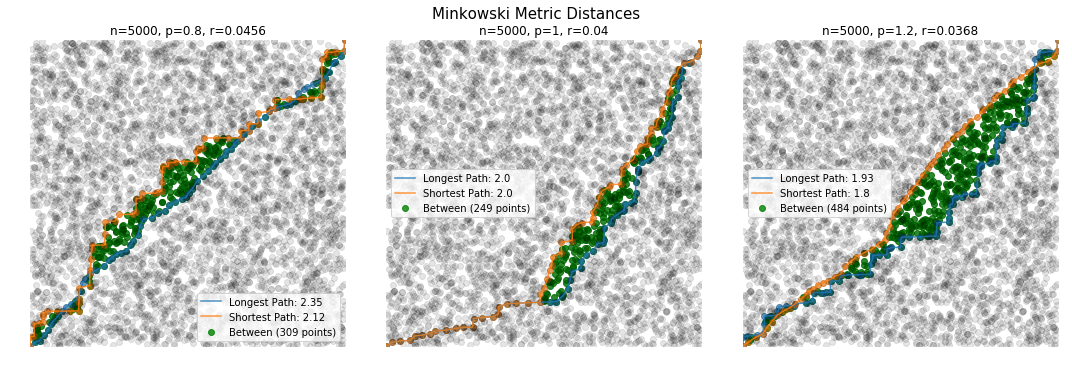

In [12]:
n=5000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

ps, rs = [0.8, 1, 1.2], np.array([1.14, 1, 0.92])/25

for p, r, ax in zip(ps, rs, axes.flatten()):

    connections = mt.get_connections(points, pval=p, radius=r)

    short_path, short_dist = mt.shortest_path(connections)
    short_path_points = np.array([points[:, u] for u in short_path]).transpose()

    long_path, long_dist = mt.longest_path(connections)
    long_path_points = np.array([points[:, u] for u in long_path]).transpose()

    betweens = mt.points_between(points, long_path_points, short_path_points)
    ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
    mt.plot_path_points(ax, paths=[long_path_points, short_path_points], path_labels=['Longest Path: {:.3}'.format(long_dist), 'Shortest Path: {:.3}'.format(short_dist)])
    ax.scatter(*points, c='k', alpha=0.1)
    ax.set(title='n={}, p={}, r={:.3}'.format(n, p, r))

title = plt.suptitle('Minkowski Metric Distances', size=15)
plt.tight_layout()
title.set_position([.5, 1.02])
plt.savefig('./img/LongShortComparison.pdf')

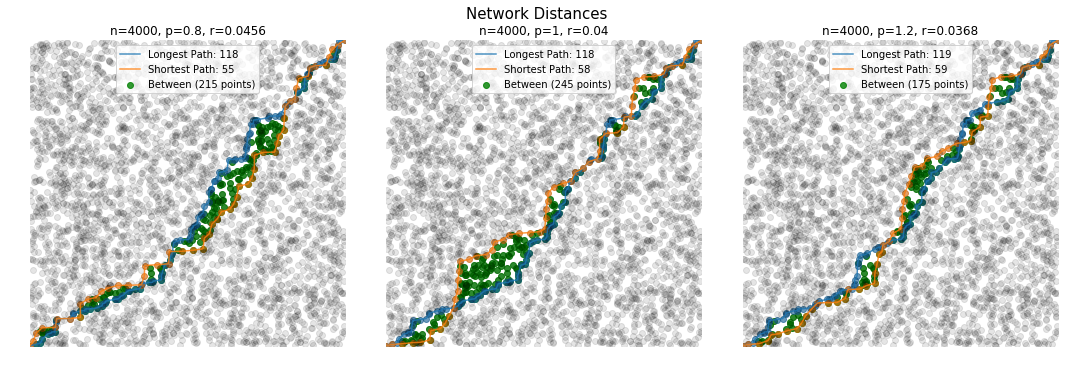

In [29]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

ps, rs = [0.8, 1, 1.2], np.array([1.14, 1, 0.92])/25

for p, r, ax in zip(ps, rs, axes.flatten()):

    connections = mt.get_connections(points, pval=p, radius=r)

    short_path, short_dist = mt.shortest_path(connections.astype(bool))
    short_path_points = np.array([points[:, u] for u in short_path]).transpose()

    long_path, long_dist = mt.longest_path(connections.astype(bool))
    long_path_points = np.array([points[:, u] for u in long_path]).transpose()

    betweens = mt.points_between(points, long_path_points, short_path_points)
    ax.scatter(*points[:, betweens], c='g', alpha=0.8, label='Between ({} points)'.format(np.sum(betweens)))
    mt.plot_path_points(ax, paths=[long_path_points, short_path_points], path_labels=['Longest Path: {}'.format(long_dist), 'Shortest Path: {}'.format(short_dist)])
    ax.scatter(*points, c='k', alpha=0.1)
    ax.set(title='n={}, p={}, r={:.3}'.format(n, p, r))

title = plt.suptitle('Network Distances', size=15)
plt.tight_layout()
title.set_position([.5, 1.02])
plt.savefig('./img/LongShortComparisonN.pdf')

In [30]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [31]:
rs = np.arange(0.04, 0.06, 0.001)
ps = [2 for _ in range(len(rs))]

av_edges = []

for p, r in zip(ps, rs):
    connections = mt.get_connections(points, pval=p, radius=r)
    av_edges.append(np.sum(connections.astype(bool))/n)

In [34]:
n=1000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

connections = mt.get_connections(points, pval=2, radius=.15)

In [35]:
long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
long_path, long_length = mt.longest_path(connections)
short_path, short_length = mt.shortest_path(connections)
short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))

In [36]:
long_path_pointsBool = np.array([points[:, u] for u in long_pathBool]).transpose()
long_path_points = np.array([points[:, u] for u in long_path]).transpose()
short_path_points = np.array([points[:, u] for u in short_path]).transpose()
short_path_pointsBool = np.array([points[:, u] for u in short_pathBool]).transpose()

In [37]:
long_path_pointsBool, long_lengthBool

(array([[1.        , 0.99687266, 0.98124571, 0.86536574, 0.72949239,
         0.68012443, 0.67967726, 0.61451394, 0.61291509, 0.58694117,
         0.56697845, 0.56410513, 0.52652068, 0.5256639 , 0.52253733,
         0.48220109, 0.48185283, 0.47859735, 0.46988829, 0.43985334,
         0.43367199, 0.39171902, 0.35410553, 0.22896226, 0.21793285,
         0.21491871, 0.11222266, 0.11071864, 0.06542641, 0.05735387,
         0.05140255, 0.04312718, 0.03889029, 0.03287217, 0.03254229,
         0.03043832, 0.02379751, 0.01078362, 0.        ],
        [1.        , 0.99242151, 0.99083957, 0.99013201, 0.98972967,
         0.97978575, 0.96657386, 0.96533022, 0.95512787, 0.93862472,
         0.93599076, 0.82791272, 0.8270268 , 0.80108686, 0.79989939,
         0.78682813, 0.76707557, 0.75669758, 0.74891078, 0.60705997,
         0.60413957, 0.59665225, 0.59431803, 0.53090056, 0.52201841,
         0.47026298, 0.42513442, 0.39454035, 0.38380743, 0.32721207,
         0.31479593, 0.30735947, 0.28449511, 

In [12]:
fileName = 'output5'
fracts = np.exp(np.arange(-3, 4, 1)*np.log(2))

# for p in np.arange(0.8, 1.25, 0.05):
# for p in [0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ]:
#     for r in [0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8]:
#         for n in [250, 500, 1000, 2000, 4000, 8000, 16000]:

headers = 'p - r - n - short_lengthBool - long_lengthBool - short_length - long_length - short_pathBoolpoints - long_pathBoolpoints - short_pathpoints - long_pathpoints\n'
file1 = open("outputs/{}.txt".format(fileName),"a") 
file1.writelines(headers)
file1.close()

r = 0.1
n = 1000
for p in [0.8, 1, 1.2]:

        print(p, r, n)

        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)

        connections = mt.get_connections(points, pval=p, radius=r)

        long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
        long_path, long_length = mt.longest_path(connections)

        short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
        short_path, short_length = mt.shortest_path(connections)

        short_pathBoolpoints, long_pathBoolpoints, short_pathpoints, long_pathpoints = [[list(points[:, u]) for u in indexes] for indexes in [short_pathBool, long_pathBool, short_path, long_path]]
        
        file1 = open("outputs/{}.txt".format(fileName),"a") 
        
        file1.writelines('{} - {} - {} - {} - {} - {} - {} - {} - {} - {} - {}\n'.format(p, r, n, short_lengthBool, long_lengthBool, short_length, long_length, short_pathBoolpoints, long_pathBoolpoints, short_pathpoints, long_pathpoints))
        file1.close()

0.8 0.1 1000
1 0.1 1000
1.2 0.1 1000


In [1]:
n=20000
av_edges=5
fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps = [0.8, 0.9, 1, 1.2]

points = np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1)

for p, ax in zip(ps, axes.flatten()):
    
    print(f'Running for p={p}')

    r = mt.norm_kernel_2D(p, av_edges/n)
    connections = mt.get_connections(points, pval=p, radius=r)
    
    path_labels=[]
    paths=[]
    
    long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
    long_path, long_length = mt.longest_path(connections)
    short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
    short_path, short_length = mt.shortest_path(connections)
    
    path_labels.append('Longest Network Path: {:}'.format(long_lengthBool))
    path_labels.append('Longest Distance Path: {:.3}'.format(long_length))
    path_labels.append('Shortest Network Path: {:}'.format(short_lengthBool))
    path_labels.append('Shortest Distance Path: {:.3}'.format(short_length))
    
    paths.append(long_pathBool)
    paths.append(long_path)
    paths.append(short_pathBool)
    paths.append(short_path)
    
    mt.plot_points_simple(ax, points, paths, path_labels)
    ax.set(title=f'p={p}, r={r:.4f}, n={n}')
    
plt.tight_layout()
# plt.savefig('./img/bigrun.pdf')

NameError: name 'plt' is not defined

In [230]:
n=1000
r=.1
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

connections = mt.get_connections(points, pval=.8, radius=r) #.astype(bool).astype(int)

# print(connections)

short_path, short_dist = mt.shortest_path(connections)
short_path_points = np.array([points[:, u] for u in short_path]).transpose()

short_path2, short_dist2 = shortest_path(connections)
short_path_points2 = np.array([points[:, u] for u in short_path2]).transpose()

long_path, long_dist = mt.longest_path(connections)
long_path_points = np.array([points[:, u] for u in long_path]).transpose()

long_path2, long_dist2 = longest_path_with_ponits(connections, points)
long_path_points2 = np.array([points[:, u] for u in long_path2]).transpose()

long_path3, long_dist3 = longest_path(connections)
long_path_points3 = np.array([points[:, u] for u in long_path3]).transpose()

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:148: RuntimeWarning: invalid value encountered in power
  radp = radius**pval
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:149: RuntimeWarning: invalid value encountered in less
  


In [2]:
# greedy paths

In [28]:
n=15
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)
connections = mt.get_connections(points, radius=.5, pval=2)

In [135]:
# find all points connected, search backwards from end
def greedy_path(connections, select_func=np.argmax, sink=None, source=None, included=None):
    """
    example of a select function:
    def rand_select(arr):
        return np.random.choice(np.where(arr)[0])
    """
    if included is None:
        included = relevant_points(connections, sink)

    n = len(connections)
    
    if sink is None:
        sink = n-1
    
    if not included[sink]:        
        return [], 0
    
    if source is None:
        source = n-2

    node = source

    path_length = 0
    path = []
    path.append(node)

    while node != sink:
        
        options = connections[:, node]*included
        
        new_node = select_func(np.ma.masked_where(options == 0, options, copy=False))

        path.append(new_node)
        path_length += connections[new_node, node]

        node = new_node

    return path, path_length


def relevant_points(connections, sink=None):
    
    n = len(connections)
    
    if sink is None:
        sink = n-1
    
    next_time = np.zeros(shape=n, dtype=int)
    next_time[sink] = 1
    
    included = np.zeros(shape=n, dtype=int)
    not_included = np.ones(shape=n, dtype=int)

    while(np.sum(next_time)):
        
        included += next_time
        not_included -= next_time

        next_time = connections[np.where(next_time)].sum(axis=0).astype(bool).astype(int)*not_included

    return included

Running for p=0.8
Running for p=0.9
Running for p=1
Running for p=1.2


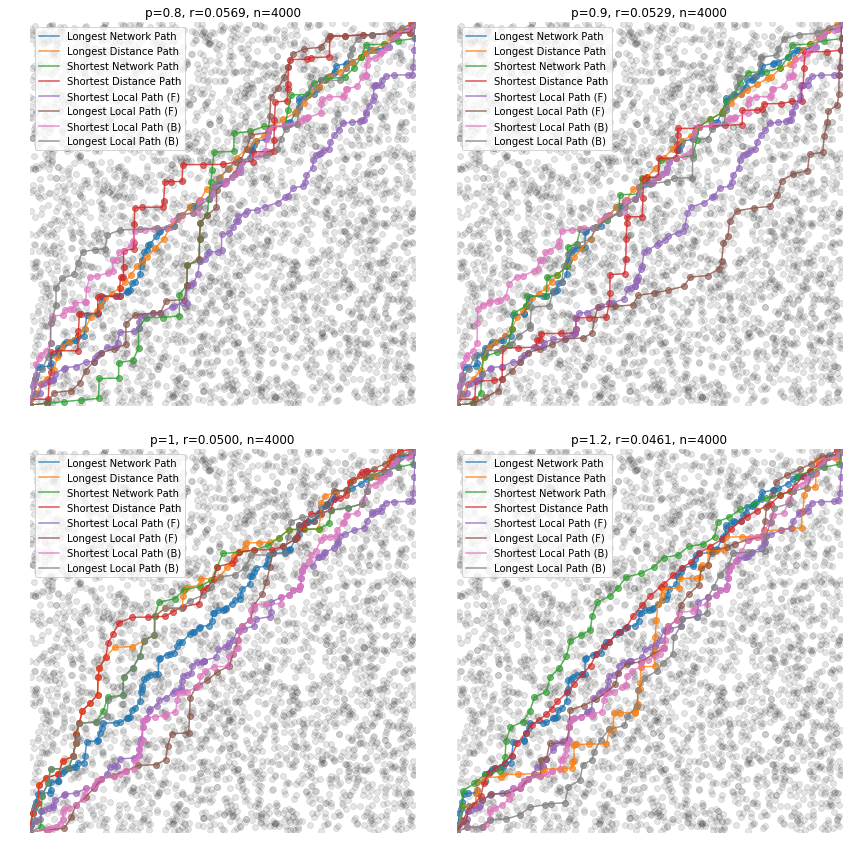

In [153]:
n=4000
av_edges=5
fig, axes = plt.subplots(2, 2, figsize=(12,12))
ps = [0.8, 0.9, 1, 1.2]

points = np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1)

for p, ax in zip(ps, axes.flatten()):
    
    print(f'Running for p={p}')

    r = mt.norm_kernel_2D(p, av_edges/n)
    connections = mt.get_connections(points, pval=p, radius=r)
    
    path_labels=[]
    paths=[]
    
    long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
    long_path, long_length = mt.longest_path(connections)
    short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
    short_path, short_length = mt.shortest_path(connections)
    
    forward_included = mt.relevant_points(connections, sink=n-1)
    backward_included = mt.relevant_points(connections.transpose(), sink=n-2)
    
    path_labels.append('Longest Network Path')
    path_labels.append('Longest Distance Path')
    path_labels.append('Shortest Network Path')
    path_labels.append('Shortest Distance Path')
    
    paths.append(long_pathBool)
    paths.append(long_path)
    paths.append(short_pathBool)
    paths.append(short_path)
    
    short_local_forward, _ = mt.greedy_path(connections, select_func=np.argmin, source=n-2, sink=n-1, included=forward_included)
    long_local_forward, _ = mt.greedy_path(connections, select_func=np.argmax, source=n-2, sink=n-1, included=forward_included)
    short_local_backward, _ = mt.greedy_path(connections.transpose(), select_func=np.argmin, source=n-1, sink=n-2, included=backward_included)
    long_local_backward, _ = mt.greedy_path(connections.transpose(), select_func=np.argmax, source=n-1, sink=n-2, included=backward_included)
    
    path_labels.append('Shortest Local Path (F)')
    path_labels.append('Longest Local Path (F)')
    path_labels.append('Shortest Local Path (B)')
    path_labels.append('Longest Local Path (B)')
    
    paths.append(short_local_forward)
    paths.append(long_local_forward)
    paths.append(short_local_backward)
    paths.append(long_local_backward)
    
    mt.plot_points_simple(ax, points, paths, path_labels)
    ax.set(title=f'p={p}, r={r:.4f}, n={n}')
    
plt.tight_layout()

In [290]:
fileName = 'constant_edges_more.txt'

# for p in np.arange(0.8, 1.25, 0.05):
# for p in [0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 , 1.15, 1.2 ]:
#     for r in [0.0125, 0.025, 0.05, 0.1, 0.2, 0.4, 0.8]:
#         for n in [250, 500, 1000, 2000, 4000, 8000, 16000]:

headers = 'p - r - n - short_met - long_met - short_net - long_net – lMin_F – lMax_F – lMin_B - lMax_B'
file1 = open("outputs/{}.txt".format(fileName),"a") 
file1.writelines(headers)
file1.close()

r = 0.1
n = 4000
for _ in range(100):
    for p in [2, 3]:
#     for p in [0.7, 1, 1.5]:

            print(p, r, n)

            rand_points = np.random.uniform(size=(2, n-2))
            edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
            points = np.concatenate((rand_points, edge_points), axis=1)

            connections = mt.get_connections(points, pval=p, radius=r)

            paths = []

            paths.append(mt.shortest_path(connections)[0][::-1])
            paths.append(mt.longest_path(connections)[0][::-1])
            paths.append(mt.shortest_path(connections.astype(bool))[0][::-1])
            paths.append(mt.longest_path(connections.astype(bool))[0][::-1]) 

            forward_included = mt.relevant_points(connections, sink=n-1)
            backward_included = mt.relevant_points(connections.transpose(), sink=n-2)

            paths.append(mt.greedy_path(connections, select_func=np.argmin, source=n-2, sink=n-1, included=forward_included)[0])
            paths.append(mt.greedy_path(connections, select_func=np.argmax, source=n-2, sink=n-1, included=forward_included)[0])
            paths.append(mt.greedy_path(connections.transpose(), select_func=np.argmin, source=n-1, sink=n-2, included=backward_included)[0])
            paths.append(mt.greedy_path(connections.transpose(), select_func=np.argmax, source=n-1, sink=n-2, included=backward_included)[0])

            short_met, long_met, short_net, long_net, lMin_F, lMax_F, lMin_B, lMax_B = [[list(points[:, u]) for u in indexes] for indexes in paths]

            file1 = open("outputs/{}.txt".format(fileName),"a") 

            file1.writelines('{} - {} - {} - {} - {} - {} - {} - {} - {} - {} - {}\n'.format(p, r, n, short_met, long_met, short_net, long_net, lMin_F, lMax_F, lMin_B, lMax_B))
            file1.close()

0.7 0.1 4000


/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:154: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py:155: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1 0.1 4000
1.5 0.1 4000
0.7 0.1 4000
1

In [278]:
n=1000
av_edges=5

p=2

x_compare = np.linspace(0, 1, 100)
r = mt.norm_kernel_2D(p, av_edges/n)

short_all_rot = []
long_all_rot = []
short_all_rotBool = []
long_all_rotBool = []

for _ in range(1000):
    
    points = np.concatenate((np.random.uniform(size=(2, n-2)), np.array([[0.0, 1.0],[0.0, 1.0]])), axis=1)
    connections = mt.get_connections(points, pval=p, radius=r)
    short_path, short_length = mt.shortest_path(connections)
    long_path, long_length = mt.longest_path(connections)
    short_pathBool, short_lengthBool = mt.shortest_path(connections.astype(bool))
    long_pathBool, long_lengthBool = mt.longest_path(connections.astype(bool))
    
    if short_length:

        short_rot_path = np.array([(np.sum(points[:, ind])/2, (points[1, ind]-points[0, ind])) for ind in short_path[::-1]])
        short_rot_spaced = np.interp(x_compare, *short_rot_path.transpose())

        short_all_rot.append(short_rot_spaced)
        
    if long_length:

        long_rot_path = np.array([(np.sum(points[:, ind])/2, (points[1, ind]-points[0, ind])) for ind in long_path[::-1]])
        long_rot_spaced = np.interp(x_compare, *long_rot_path.transpose())

        long_all_rot.append(long_rot_spaced)
        
    if short_lengthBool:

        short_rot_pathBool = np.array([(np.sum(points[:, ind])/2, (points[1, ind]-points[0, ind])) for ind in short_pathBool[::-1]])
        short_rot_spacedBool = np.interp(x_compare, *short_rot_pathBool.transpose())

        short_all_rotBool.append(short_rot_spacedBool)
        
    if long_lengthBool:

        long_rot_pathBool = np.array([(np.sum(points[:, ind])/2, (points[1, ind]-points[0, ind])) for ind in long_pathBool[::-1]])
        long_rot_spacedBool = np.interp(x_compare, *long_rot_pathBool.transpose())

        long_all_rotBool.append(long_rot_spacedBool)

long_all_rot = np.array(long_all_rot)
short_all_rot = np.array(short_all_rot)
long_all_rotBool = np.array(long_all_rotBool)
short_all_rotBool = np.array(short_all_rotBool)

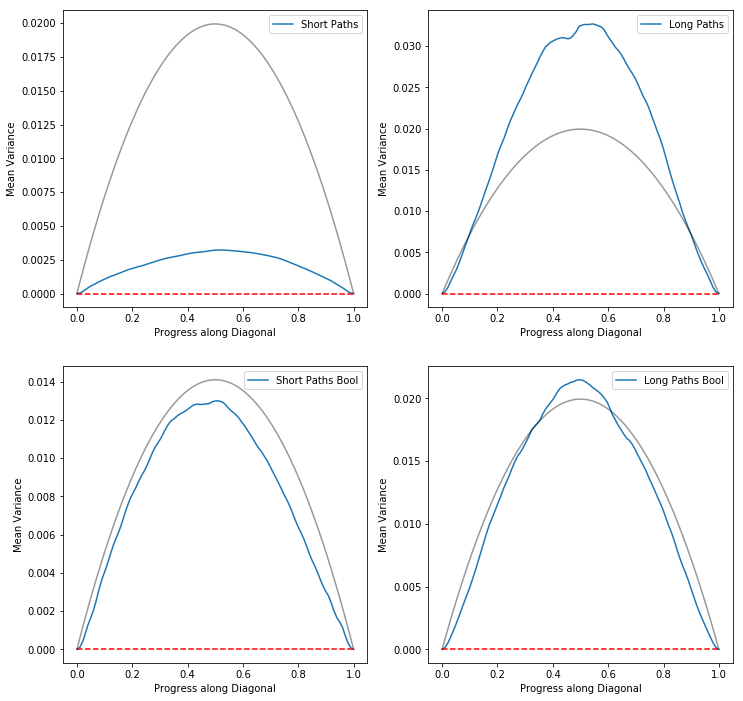

In [286]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

ax1.plot(x_compare, np.mean(short_all_rot*short_all_rot, axis=0), label='Short Paths')
ax1.plot(x_compare,x_compare*0, 'r--')
ax1.plot(x_compare, x_compare*(1-x_compare)*r, 'k', alpha=0.4)
ax1.legend()

ax2.plot(x_compare, np.mean(long_all_rot*long_all_rot, axis=0), label='Long Paths')
ax2.plot(x_compare,x_compare*0, 'r--')
ax2.plot(x_compare, x_compare*(1-x_compare)*r, 'k', alpha=0.4)
ax2.legend()

ax3.plot(x_compare, np.mean(short_all_rotBool*short_all_rotBool, axis=0), label='Short Paths Bool')
ax3.plot(x_compare,x_compare*0, 'r--')
ax3.plot(x_compare, x_compare*(1-x_compare)*r/np.sqrt(2), 'k', alpha=0.4)
ax3.legend()

ax4.plot(x_compare, np.mean(long_all_rotBool*long_all_rotBool, axis=0), label='Long Paths Bool')
ax4.plot(x_compare,x_compare*0, 'r--')
ax4.plot(x_compare, x_compare*(1-x_compare)*r, 'k', alpha=0.4)
ax4.legend()

for ax in [ax1, ax2, ax3, ax4]:
    ax.set(xlabel='Progress along Diagonal', ylabel='Mean Variance')

In [289]:
n = 1000
p = 2
r = 0.2

rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

connections = mt.get_connections(points, pval=p, radius=r)

paths = []

paths.append(mt.shortest_path(connections)[0][::-1])
paths.append(mt.longest_path(connections)[0][::-1])
paths.append(mt.shortest_path(connections.astype(bool))[0][::-1])
paths.append(mt.longest_path(connections.astype(bool))[0][::-1]) 

forward_included = mt.relevant_points(connections, sink=n-1)
backward_included = mt.relevant_points(connections.transpose(), sink=n-2)

paths.append(mt.greedy_path(connections, select_func=np.argmin, source=n-2, sink=n-1, included=forward_included)[0])
paths.append(mt.greedy_path(connections, select_func=np.argmax, source=n-2, sink=n-1, included=forward_included)[0])
paths.append(mt.greedy_path(connections.transpose(), select_func=np.argmin, source=n-1, sink=n-2, included=backward_included)[0])
paths.append(mt.greedy_path(connections.transpose(), select_func=np.argmax, source=n-1, sink=n-2, included=backward_included)[0])

short_met, long_met, short_net, long_net, lMin_F, lMax_F, lMin_B, lMax_B = [[list(points[:, u]) for u in indexes] for indexes in paths]


print(p, r, n)
[print(elem) for elem in [short_met, long_met, short_net, long_net, lMin_F, lMax_F, lMin_B, lMax_B]]

2 0.2 1000
[[0.0, 0.0], [0.10685924579801998, 0.1121317695253915], [0.23174996968799555, 0.23772467318078905], [0.32209990488631557, 0.326711331855045], [0.45003125085457285, 0.46045996971646963], [0.5058385503602301, 0.5163718354330891], [0.6466552927404869, 0.6537836624228468], [0.6701468540861534, 0.6758013796872379], [0.8040041982379782, 0.8062743053910486], [0.898446102315353, 0.8968352073763209], [1.0, 1.0]]
[[0.0, 0.0], [0.016639105076385885, 0.0063192240220916185], [0.02503849550582571, 0.05001121283021237], [0.02583952431830072, 0.2204648036853848], [0.11214190598284546, 0.2264157203912024], [0.11325392860036099, 0.2891646746356322], [0.1134239305595297, 0.4745615713551333], [0.29313003198753185, 0.47477655766365634], [0.29432105113564355, 0.6233268279734755], [0.2955481797672215, 0.6244624100166768], [0.2985888096486914, 0.6257558356565652], [0.3007656689553162, 0.7310550343988761], [0.30140813833698976, 0.8410781606809519], [0.4594961262515751, 0.841425654294774], [0.6489082

[None, None, None, None, None, None, None, None]

In [5]:
con_edg = pd.read_csv('outputs/constant_edges_all.txt', header=0, delimiter=" - ")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [10]:
con_edg = pd.read_csv('outputs/constant_edges_more.txt.txt', header=0, delimiter=" - ")
con_edg.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_met,long_met,short_net,long_net,lMin_F,lMax_F,lMin_B,lMax_B
0,2,0.1,4000,"[[0.0, 0.0], [0.027510389801717938, 0.03430862...","[[0.0, 0.0], [0.0003795444533767345, 0.0803141...","[[0.0, 0.0], [0.08120180084878315, 0.056333934...","[[0.0, 0.0], [0.032407315981303086, 0.01168144...","[[0.0, 0.0], [0.012959830641719683, 0.01278474...","[[0.0, 0.0], [0.08120180084878315, 0.056333934...","[[1.0, 1.0], [0.9962779075783361, 0.9921509430...","[[1.0, 1.0], [0.9350591918058151, 0.9276823615..."
1,3,0.1,4000,"[[0.0, 0.0], [0.056918622773518224, 0.05908961...","[[0.0, 0.0], [0.08539335038970086, 0.000682509...","[[0.0, 0.0], [0.08925043484249817, 0.060465611...","[[0.0, 0.0], [0.004579200248920667, 0.01969193...","[[0.0, 0.0], [0.013356437146699318, 0.01117293...","[[0.0, 0.0], [0.03766644233887795, 0.097979328...","[[1.0, 1.0], [0.9683656530877216, 0.9947805657...","[[1.0, 1.0], [0.9522167962945848, 0.9049339094..."
2,2,0.1,4000,"[[0.0, 0.0], [0.06153080269095301, 0.060502153...","[[0.0, 0.0], [0.028518767540159917, 0.00310261...","[[0.0, 0.0], [0.07359891347316616, 0.064738051...","[[0.0, 0.0], [0.005712026151307059, 0.00815859...","[[0.0, 0.0], [0.005712026151307059, 0.00815859...","[[0.0, 0.0], [0.011923485752677432, 0.09888123...","[[1.0, 1.0], [0.9933967472415781, 0.9875485265...","[[1.0, 1.0], [0.9427143466756778, 0.9183741345..."
3,3,0.1,4000,"[[0.0, 0.0], [0.056456547182022754, 0.05489921...","[[0.0, 0.0], [0.07856144592798031, 0.002676907...","[[0.0, 0.0], [0.09391851762982129, 0.049835788...","[[0.0, 0.0], [0.012980637274709106, 0.01444780...","[[0.0, 0.0], [0.0025316775811765613, 0.0166527...","[[0.0, 0.0], [0.09391851762982129, 0.049835788...","[[1.0, 1.0], [0.9845189729362867, 0.9845053344...","[[1.0, 1.0], [0.9014253558038562, 0.9661502043..."
4,2,0.1,4000,"[[0.0, 0.0], [0.04535076334011634, 0.045584130...","[[0.0, 0.0], [0.021196174439580995, 0.00052332...","[[0.0, 0.0], [0.07696288689926012, 0.063748892...","[[0.0, 0.0], [0.0002222360200456741, 0.0110992...","[[0.0, 0.0], [0.003585154504529897, 0.01033785...","[[0.0, 0.0], [0.07696288689926012, 0.063748892...","[[1.0, 1.0], [0.9951809364719587, 0.9900242054...","[[1.0, 1.0], [0.9704594871089961, 0.9059532372..."


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


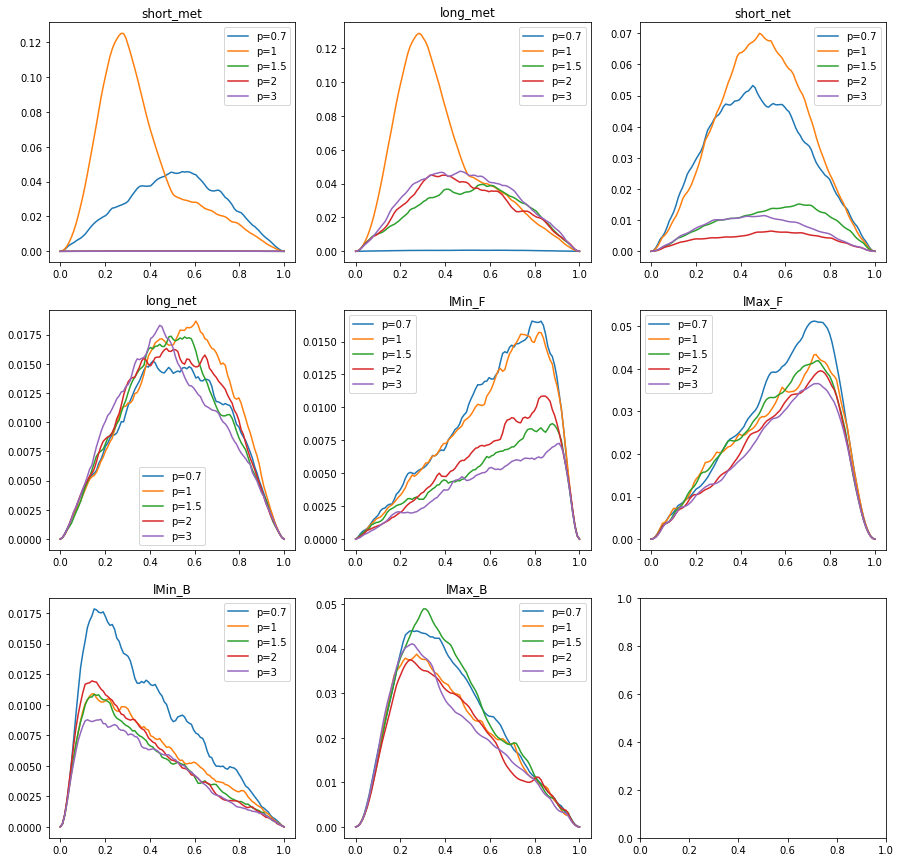

In [11]:
con_edg = pd.read_csv('outputs/constant_edges_all.txt', header=0, delimiter=" - ")

df_labels = ['p', 'r', 'n', 'short_met', 'long_met', 'short_net', 'long_net', 'lMin_F', 'lMax_F', 'lMin_B', 'lMax_B']
x_compare = np.linspace(0, 1, 100)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

for label, ax in zip(df_labels[3::], axes.flatten()):
    for p in [0.7, 1, 1.5]:
        
        ensemble_spaced = []
        
        for pointstr in con_edg.loc[con_edg['p'] == p][label]:
            path = mt.points_str(pointstr)

            if path[0][0] == 0:
            
                rot_path = np.array([(np.sum(path[:, i])/2, (path[1, i]-path[0, i])) for i in range(len(path[0]))])
                rot_spaced = np.interp(x_compare, *rot_path.transpose())
                
            else:
                rot_path = np.array([(np.sum(path[:, i])/2, (path[1, i]-path[0, i])) for i in range(len(path[0]))][::-1])
                rot_spaced = np.interp(x_compare, *rot_path.transpose())

            ensemble_spaced.append(rot_spaced)

        ensemble_spaced = np.array(ensemble_spaced)
        ax.plot(x_compare, np.mean(ensemble_spaced**2, axis=0), label=f'p={p}')
        
con_edg = pd.read_csv('outputs/constant_edges_more.txt.txt', header=0, delimiter=" - ")
        
for label, ax in zip(df_labels[3::], axes.flatten()):
    for p in [2, 3]:
        
        ensemble_spaced = []
        
        for pointstr in con_edg.loc[con_edg['p'] == p][label]:
            path = mt.points_str(pointstr)

            if path[0][0] == 0:
            
                rot_path = np.array([(np.sum(path[:, i])/2, (path[1, i]-path[0, i])) for i in range(len(path[0]))])
                rot_spaced = np.interp(x_compare, *rot_path.transpose())
                
            else:
                rot_path = np.array([(np.sum(path[:, i])/2, (path[1, i]-path[0, i])) for i in range(len(path[0]))][::-1])
                rot_spaced = np.interp(x_compare, *rot_path.transpose())

            ensemble_spaced.append(rot_spaced)

        ensemble_spaced = np.array(ensemble_spaced)
        ax.plot(x_compare, np.mean(ensemble_spaced**2, axis=0), label=f'p={p}')
        
#     ax.plot(x_compare, x_compare*(1-x_compare), label='t(T-t)')
    ax.set(title=label)
    ax.legend()


In [374]:
# plt.plot(*mt.points_str(con_edg['lMax_B'][0]))

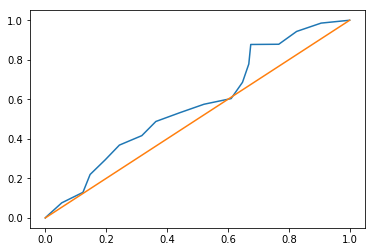

In [364]:
plt.plot(*path)
plt.plot([0, 1], [0, 1])

In [353]:
rot_path = np.array([(np.sum(path[:, i])/2, (path[1, i]-path[0, i])) for i in range(len(path[0]))])

In [354]:
rot_path

array([[ 1.        ,  0.        ],
       [ 0.93735031, -0.00128487],
       [ 0.88747405,  0.09576483],
       [ 0.83189109,  0.15725126],
       [ 0.77596902,  0.22956608],
       [ 0.72336432,  0.31788207],
       [ 0.66076095,  0.29985861],
       [ 0.6082121 ,  0.38978634],
       [ 0.54675732,  0.41688643],
       [ 0.49224702,  0.50042723],
       [ 0.44319653,  0.40870621],
       [ 0.38158253,  0.44300451],
       [ 0.32654441,  0.51433561],
       [ 0.27103685,  0.48235378],
       [ 0.22295762,  0.39268341],
       [ 0.1752566 ,  0.30172231],
       [ 0.16232751,  0.28013828],
       [ 0.11952045,  0.1954138 ],
       [ 0.06576836,  0.10884446],
       [ 0.02048829,  0.02618719],
       [ 0.        ,  0.        ]])

In [54]:
all_paths = mt.all_paths(2, r=0.1, n=1000)

In [55]:
fileName = 'new_test.txt'

mt.all_path_write_heads(fileName)
mt.write_all_paths(fileName, 2, 0.1, 1000, all_paths)

'new_test.txt'

In [21]:
pd.read_csv('new_test.txt', header=0, delimiter=" - ")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0.8,0.2,104
0,0.8,0.20,155
1,0.8,0.20,216
2,0.8,0.20,158
3,0.8,0.20,134
4,0.8,0.20,110
5,0.8,0.20,156
6,0.8,0.20,255
7,0.8,0.20,194
8,0.8,0.20,104
9,1.2,0.10,540


In [62]:
def all_paths_bulk(fileName, ps, ns, rs, repeats=1, verbose=True):
    mt.all_path_write_heads(fileName)
    for p, n, r in zip(ps, ns, rs):
        if verbose:
            print(f'{p}-{n}-{r}', end=': ')
        for i in range(repeats):
            if verbose:
                print(i, end ='')
            all_paths = mt.all_paths(p, r, n)
            mt.write_all_paths(fileName, p, r, n, all_paths)
        if verbose:
            print()

In [69]:
mt.all_paths_bulk('new_test.txt', [0.8, 0.8, 1.2, 1.2], [4000, 4000, 4000, 4000], [0.1, 0.1, 0.1, 0.1])

0.8-4000-0.1: 0
0.8-4000-0.1: 0
1.2-4000-0.1: 0
1.2-4000-0.1: 0


In [26]:
import importlib
importlib.reload(mt)

<module 'minkowskitools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowskitools.py'>

In [27]:
fileName = 'outputs/all_paths_testt.txt'

ps = []
ns = []
rs = []
r = 0.05
for n in np.arange(1000, 3000, 1000):    
    for p in [0.8, 1.2]:
        ps.append(p)
        ns.append(n)
        rs.append(r)
        
mt.all_paths_bulk(fileName, ps, ns, rs, repeats=10)

0.8-1000-0.05: 0123456789
1.2-1000-0.05: 0123456789
0.8-2000-0.05: 0123456789
1.2-2000-0.05: 0123456789


In [2]:
mt.relevant_points(mt.get_connections(np.array([[0.0, 1.0],[0.0, 1.0]]), pval=2, radius=.1))

array([0, 1])

In [4]:
conns = mt.get_connections(np.array([[0.0, 1.0],[0.0, 1.0]]), pval=2, radius=.1)

In [7]:
mt.greedy_path(conns)

([], 0)

In [34]:
dftest = pd.read_csv('outputs/all_paths_testt.txt', header=0, delimiter=" - ")
dftest.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_met,long_met,short_net,long_net,lMin_F,lMax_F,lMin_B,lMax_B
0,0.8,0.05,1000,[],[],[],[],[],[],[],[]
1,0.8,0.05,1000,[],[],[],[],[],[],[],[]
2,0.8,0.05,1000,[],[],[],[],[],[],[],[]
3,0.8,0.05,1000,[],[],[],[],[],[],[],[]
4,0.8,0.05,1000,[],[],[],[],[],[],[],[]


In [37]:
paths = [mt.points_str(dftest.loc[20][label]) for label in ['short_met', 'long_met', 'short_net', 'long_net']]

In [40]:
[len(path.transpose()) for path in paths]

[66, 58, 57, 72]

In [41]:
dftest

,p,r,n,short_met,long_met,short_net,long_net,lMin_F,lMax_F,lMin_B,lMax_B
0,0.8,0.05,1000,[],[],[],[],[],[],[],[]
1,0.8,0.05,1000,[],[],[],[],[],[],[],[]
2,0.8,0.05,1000,[],[],[],[],[],[],[],[]
3,0.8,0.05,1000,[],[],[],[],[],[],[],[]
4,0.8,0.05,1000,[],[],[],[],[],[],[],[]
5,0.8,0.05,1000,[],[],[],[],[],[],[],[]
6,0.8,0.05,1000,[],[],[],[],[],[],[],[]
7,0.8,0.05,1000,[],[],[],[],[],[],[],[]
8,0.8,0.05,1000,[],[],[],[],[],[],[],[]
9,0.8,0.05,1000,[],[],[],[],[],[],[],[]


In [213]:
limscale = pd.read_csv('outputs/lim_scale.txt', header=0, delimiter=" - ")
connected = limscale[limscale['short_met'] != '[]']
connected['short_net_len'] = [mt.points_str(elem).shape[1]-1 for elem in connected['short_net']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
gr = connected[['p', 'r', 'n', 'short_net_len']].groupby(['p', 'r', 'n']).mean().reset_index()
gr['err'] = connected[['p', 'r', 'n', 'short_net_len']].groupby(['p', 'r', 'n']).std().reset_index()['short_net_len']
gr['e'] = gr['n']*gr['r']*gr['r']*mt.kernel_area2D(gr['p'])

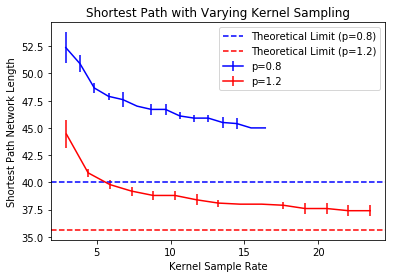

In [222]:
for p, c in zip([0.8, 1.2], ['b',  'r']):
    plt.errorbar(gr[gr['p'] == p]['e'], gr[gr['p'] == p]['short_net_len'], gr[gr['p'] == p]['err'], label = f'p={p}', color=c)

plt.axhline(2/0.05, color='b', ls='--', label='Theoretical Limit (p=0.8)')
plt.axhline(2**(1/1.2)/0.05, color='r', ls='--', label='Theoretical Limit (p=1.2)')

plt.legend()
plt.gca().set(title='Shortest Path with Varying Kernel Sampling', xlabel='Kernel Sample Rate', ylabel='Shortest Path Network Length')
plt.savefig('img/shortsample.pdf')

[Text(0, 0.5, 'Shortest Path Network Length'),
 Text(0.5, 0, '$\\sqrt{n}$'),
 Text(0.5, 1.0, 'Shortest Path with Varying Kernel Sampling')]

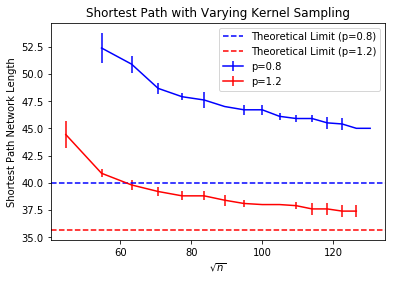

In [223]:
for p, c in zip([0.8, 1.2], ['b',  'r']):
    plt.errorbar(np.sqrt(gr[gr['p'] == p]['n']), gr[gr['p'] == p]['short_net_len'], gr[gr['p'] == p]['err'], label = f'p={p}', color=c)

plt.axhline(2/0.05, color='b', ls='--', label='Theoretical Limit (p=0.8)')
plt.axhline(2**(1/1.2)/0.05, color='r', ls='--', label='Theoretical Limit (p=1.2)')

plt.legend()
plt.gca().set(title='Shortest Path with Varying Kernel Sampling', xlabel=r'$\sqrt{n}$', ylabel='Shortest Path Network Length')

In [111]:
connected[['p', 'r', 'n', 'short_net_len']].groupby(['p', 'r', 'n']).std().reset_index()['short_net_len']

0     1.407886
1     0.781736
2     0.500000
3     0.316228
4     0.699206
5     0.000000
6     0.483046
7     1.272418
8     0.353553
9     0.421637
10    0.421637
11    0.421637
12    0.421637
13    0.516398
14    0.500000
Name: short_net_len, dtype: float64

In [136]:
rs = []
ns = []
ps = []
for k in range(1, 11):
    for p in [0.7, 1.2, 2]:
        ps.append(p)
        ns.append(k*1000)
        rs.append(.1/np.sqrt(k))       

In [140]:
mt.all_paths_bulk('outputs/scaling_collapse.txt', ps, ns, rs, repeats=10)

0.7-1000-0.1: 0

/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowskitools.py:154: RuntimeWarning: invalid value encountered in power
  distsp = (x_diffs**pval + y_diffs**pval)*(x_diffs>0)*(y_diffs>0)
/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowskitools.py:155: RuntimeWarning: invalid value encountered in less
  connections = (((distsp<radp)*distsp)**(1/pval))*(x_diffs>0)*(y_diffs>0)


123456789
1.2-1000-0.1: 0123456789
2-1000-0.1: 0123456789
0.7-2000-0.07071067811865475: 0123456789
1.2-2000-0.07071067811865475: 0123456789
2-2000-0.07071067811865475: 0123456789
0.7-3000-0.05773502691896258: 0123456789
1.2-3000-0.05773502691896258: 0123456789
2-3000-0.05773502691896258: 0123456789
0.7-4000-0.05: 0123456789
1.2-4000-0.05: 0123456789
2-4000-0.05: 0123456789
0.7-5000-0.044721359549995794: 0123456789
1.2-5000-0.044721359549995794: 0123456789
2-5000-0.044721359549995794: 0123456789
0.7-6000-0.040824829046386304: 0123456789
1.2-6000-0.040824829046386304: 0123456789
2-6000-0.040824829046386304: 0123456789
0.7-7000-0.03779644730092272: 0123456789
1.2-7000-0.03779644730092272: 0123456789
2-7000-0.03779644730092272: 0123456789
0.7-8000-0.035355339059327376: 0123456789
1.2-8000-0.035355339059327376: 0123456789
2-8000-0.035355339059327376: 0

KeyboardInterrupt: 

In [209]:
scaling = pd.read_csv('outputs/scaling_collapse.txt', header=0, delimiter=" - ")
scaling = scaling[scaling['short_net'] != '[]']

scaling['short_net_len'] = [mt.points_str(elem).shape[1]-1 for elem in scaling['short_net']]
scaling['long_net_len'] = [mt.points_str(elem).shape[1]-1 for elem in scaling['long_net']]

scaled = scaling[['p', 'r', 'n', 'short_net_len', 'long_net_len']].groupby(['p', 'r', 'n']).mean().reset_index()
scaled['short_err'] = scaling[['p', 'r', 'n', 'short_net_len', 'long_net_len']].groupby(['p', 'r', 'n']).std().reset_index()['short_net_len']
scaled['long_err'] = scaling[['p', 'r', 'n', 'short_net_len', 'long_net_len']].groupby(['p', 'r', 'n']).std().reset_index()['short_net_len']

scaled.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n,short_net_len,long_net_len,short_err,long_err
0,0.7,0.035355,8000,78.222222,170.000000,1.394433,1.394433
1,0.7,0.037796,7000,73.555556,158.444444,1.236033,1.236033
2,0.7,0.040825,6000,68.125000,148.000000,1.356203,1.356203
3,0.7,0.044721,5000,62.000000,133.555556,1.322876,1.322876
4,0.7,0.050000,4000,55.888889,121.222222,1.166667,1.166667


0.8658821044922951 0.95905268546354
0.6233365467272747 0.5602640362744538
0.4964718855266109 0.8720757092114937
1.9574973662977282 -3.4389058072443106


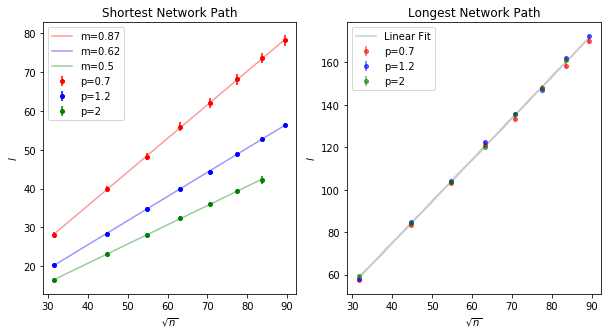

In [211]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(10, 5))

for p, c in zip([0.7, 1.2, 2], ['r', 'b', 'g']):
    working = scaled[scaled['p'] == p]
    ax1.errorbar(np.sqrt(working['n']), working['short_net_len'], working['short_err'], label = f'p={p}', color=c, alpha=1, fmt='o', ms=4)
    ax2.errorbar(np.sqrt(working['n']), working['long_net_len'], working['long_err'], label = f'p={p}', color=c, alpha=0.6, fmt='o', ms=4)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.sqrt(working['n']), working['short_net_len'])
    print(slope, intercept)
    ax1.plot(np.sqrt(working['n']), slope*np.sqrt(working['n'])+intercept, alpha=0.4, color=c, label=f'm={slope:.2}')

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(np.sqrt(scaled['n']), scaled['long_net_len'])
ax2.plot(np.sqrt(scaled['n']), np.sqrt(scaled['n'])*slope+intercept, c='k', alpha=0.2, label='Linear Fit')
print(slope, intercept)

ax1.set(title='Shortest Network Path', ylabel='$l$', xlabel=r'$\sqrt{n}$')
ax2.set(title='Longest Network Path', ylabel='$l$', xlabel=r'$\sqrt{n}$')

ax1.legend()
ax2.legend()

plt.savefig('img/lscaled.pdf')

In [ ]:
pd.read_csv('new_test.txt', header=0, delimiter=" - ")